In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [4]:
def ravel_load_images_all_r(folder_head):
    r_images_all=np.zeros((15, 10, 4096))  
    r_images = []
    for i in range(1,16):
        r_images.clear()
        for j in range(1,11):
            img = mpimg.imread(os.path.join(os.path.join(folder_head, str(i)), str(j)+".pgm"))
            if img is not None:
                r_images.append((np.array(img)).flatten())
        r_images_all[i-1]=(r_images)
    return r_images_all

In [7]:
ravel_np_all_subjects=(ravel_load_images_all_r(r"D:\Acads\Sem 4\MFDS\Term project 2020\Term project 2020\Dataset_Question1"))

In [9]:
def pc_images(image_2d,no_of_PC):
    n=no_of_PC
    cov_mat = (image_2d.T - np.mean(image_2d , axis = 1)).T
    eig_val, eig_vec = np.linalg.eigh(np.matmul(cov_mat.T,cov_mat))
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    PC = (np.matmul(cov_mat,eig_vec).T+ np.mean(image_2d, axis = 1)).T
    PC_2d = np.zeros((64,64,10))
    for i in range(10):
        PC_2d[:,:,i] = PC[:,i].reshape(-1,64)
    Imm=np.zeros((64,64))
    for i in range(n):
        Imm=Imm+PC_2d[:,:,i]
    Imm=Imm/n
    return Imm.flatten()

In [10]:
repr_images= np.zeros((15,4096))
for i in range(15):
    repr_images[i]=pc_images((ravel_np_all_subjects[i]).T,3)#no of pc enter here

In [11]:
#import matplotlib.gridspec as gridspec
def view_repr_images(repr_images):
    fig=plt.figure(figsize=(8, 8))
    for i in range(repr_images.shape[0]):
        ax = fig.add_subplot(5, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(repr_images[i].reshape(64,64), cmap="gray")
        plt.grid(False)
        plt.title('Representative image for class '+str(i+1))
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    fig.set_size_inches(15,15)
    plt.show()

In [12]:
def tr_accuracy(ravel_np_all_subjects,repr_images):
    corrt=0
    for i in range(15):
        for j in range(10):
            loss=np.linalg.norm(ravel_np_all_subjects[i][j]-repr_images[0])
            min_loss=loss
            label=0
            for k in range(15):
                loss=np.linalg.norm(ravel_np_all_subjects[i][j]-repr_images[k])
                if loss <= min_loss:
                    min_loss=loss
                    label=k
            if label==i:
                corrt=corrt+1
    print("No of Images correctly classified are",corrt,"out of 150")
    print("Accuracy is :",round((corrt/(ravel_np_all_subjects.shape[0]*ravel_np_all_subjects.shape[1]))*100 , 2),"%")

In [15]:
#print("Accuracy is :",tr_accuracy(ravel_np_all_subjects,repr_images),"%")
tr_accuracy(ravel_np_all_subjects,repr_images)

No of Images correctly classified are 120 out of 150
Accuracy is : 80.0 %


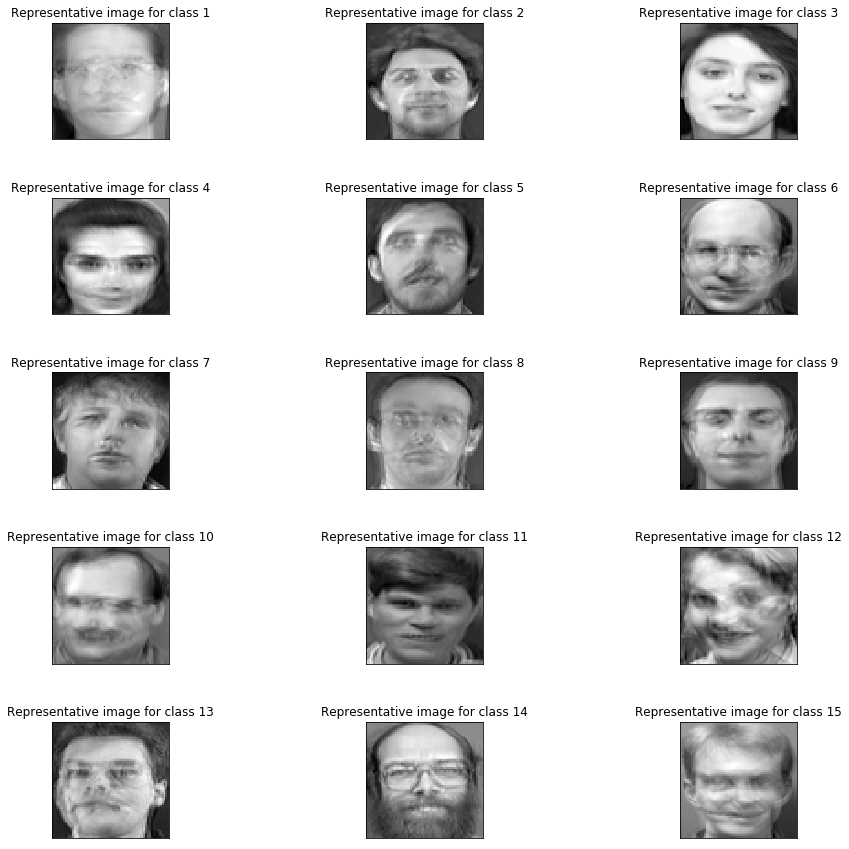

In [16]:
view_repr_images(repr_images)